In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
class PLA:
    '''Perceptron Learning Algorithm'''
    
    def __init__(self, w=None, max_iters = 200):
        self._w = w
        self._niters = 0
        self._max_iters = max_iters
    
    def fit(self, X, y):
        if self._w is None:
            self._w = np.zeros(3)
            
        if X.shape[1] == 2:
            X = np.c_[np.ones(len(X)), X]
            
        y_pred = self.predict(X)
        while not np.alltrue(y_pred == y):
            self._niters += 1
            X_miss = X[y_pred != y]
            y_miss = y[y_pred != y]
            if len(X_miss) > 0:
                idx = np.random.randint(0, X_miss.shape[0])
                self._w += y_miss[idx]*X_miss[idx]
            if self._niters > self._max_iters:
                #print('exit training: exceed maximum epoch')
                break
            y_pred = self.predict(X)
        return self
    
    def predict(self, X):
        y = self.product(X)
        if y is not None:
            return self.activation(y)
    
    def product(self, X):
        if X.shape[1] == 2:
            X = np.c_[np.ones(len(X)), X]
        
        try:
            return np.dot(X, self._w)
        except TypeError:
            print('No weights found')
            return
    
    def activation(self, y):
        '''
        +1 if y_i > 0
        -1 if y_i < 0
        0 otherwise
        '''
        return np.sign(y)

In [75]:
def rand_points(n):
    '''return n (x, y) points'''
    return np.random.uniform(low=-1, high=1, size=n*2).reshape(-1, 2)

def get_weights_from_2point(p1, p2):
    '''return [w0, w1, w2] from two given 2d-points'''
    v = p1 - p2
    w = np.array([-v[1]*p1[0] + v[0]*p1[1], v[1], v[0]])
    return w

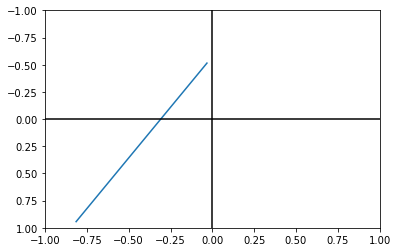

In [5]:
np.random.seed(55)

p1 = np.random.uniform(low=-1., high=1., size=2)
p2 = np.random.uniform(low=-1., high=1., size=2)

plt.plot((p1[0], p2[0]), (p1[1], p2[1]))
plt.axis([-1,1,1,-1])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [6]:
v = p2 - p1
v

array([ 0.78150339, -1.45826644])

In [7]:
w = np.array([-v[1]*p1[0] + v[0]*p1[1], v[1], v[0]])

In [8]:
w

array([-0.44951166, -1.45826644,  0.78150339])

In [138]:
def plot_bondary(weights):
    xs = np.linspace(-1, 1, num=200)
    ys = np.linspace(-1, 1, num=200)
    xx, yy = np.meshgrid(xs, ys)

    z = np.c_[xx.ravel(), yy.ravel()]
    zz = np.dot(np.c_[np.ones(len(z)), z], weights)
    zz = np.where(zz > 0, 1, -1)

    plt.contourf(xx, yy, zz.reshape(xx.shape), cmap=plt.cm.coolwarm, alpha=.4)

In [268]:
N = 100
niters_list = []
p_errors = []
trial = 1000

while len(niters_list) < trial:
    p1, p2 = rand_points(2)
    w = get_weights_from_2point(p1, p2)
    X_rand = rand_points(N)
    f = PLA(w)
    y_true = f.predict(X_rand)
    if np.abs(np.mean(y_true == 1) - np.mean(y_true==-1)) > 0.3:
        continue
    h = PLA(max_iters=5000)
    h = h.fit(X_rand, y_true)
    y_pred = h.predict(X_rand)
    if np.allclose(y_true, y_pred):
        niters_list.append(h._niters)
        p_errors.append(p_error(f, h))

In [269]:
np.mean(niters_list), len(niters_list)

(135.91499999999999, 1000)

In [270]:
np.mean(p_errors)

0.0135979

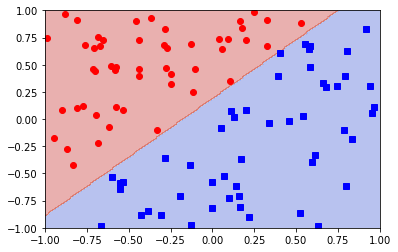

In [249]:
plot_bondary(w)

idx_1 = (y_true==1)
idx_2 = (y_true==-1)
plt.plot(X_rand[idx_1][:, 0], X_rand[idx_1][:, 1], 'ro')
plt.plot(X_rand[idx_2][:, 0], X_rand[idx_2][:, 1], 'bs')

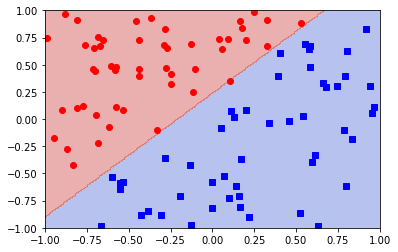

In [250]:
plot_bondary(h._w)

y_pred = h.predict(X_rand)
idx_1 = (y_pred == 1)
idx_2 = (y_pred == -1)
plt.plot(X_rand[idx_1][:, 0], X_rand[idx_1][:, 1], 'ro')
plt.plot(X_rand[idx_2][:, 0], X_rand[idx_2][:, 1], 'bs')

In [239]:
f._w, h._w

(array([ 0.05851046,  0.45706396, -0.29085849]),
 array([ 1.        ,  5.19847299, -3.83309648]))

In [251]:
def p_error(f, g):
    xs = np.linspace(-1, 1, 200)
    ys = np.linspace(-1, 1, 200)
    xx, yy = np.meshgrid(xs, ys)
    X_space = np.c_[xx.ravel(), yy.ravel()]
    y_f = f.predict(X_space)
    y_g = h.predict(X_space)
    return (y_f != y_g).mean()

In [253]:
p_error(f, h)

0.016975000000000001